# Traffic Light Classifier - Gaspard Shen

## Project: Build a Traffice Light Classifier - Real Image
After we detect the real world traffic light location, next step is to determine whether it is red, green or yellow light

### Step1: Load the Data

In [2]:
# all the import
import numpy as np
import matplotlib.pyplot as plt
import random
import glob
import cv2
import os

from PIL import Image

# Visualizations will be shown in the notebook.
%matplotlib inline

Num of the Red samples: 104
Num of the Green samples: 298
Num of the Yellow samples: 42


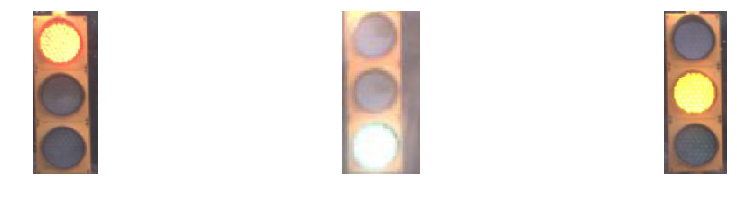

In [3]:
red_imglist = glob.glob('./trafficlight_images/Red/*.jpg')
green_imglist = glob.glob('./trafficlight_images/Green/*.jpg')
yellow_imglist = glob.glob('./trafficlight_images/Yellow/*.jpg')
print('Num of the Red samples:', len(red_imglist))
print('Num of the Green samples:', len(green_imglist))
print('Num of the Yellow samples:', len(yellow_imglist))

fig, axs = plt.subplots(1, 3, figsize=(16,3))

idx = random.randint(0, len(red_imglist))
red_img = cv2.imread(red_imglist[idx])
axs[0].axis('off')
axs[0].imshow(cv2.cvtColor(red_img, cv2.COLOR_BGR2RGB))

idx = random.randint(0, len(green_imglist))
green_img = cv2.imread(green_imglist[idx])
axs[1].axis('off')
axs[1].imshow(cv2.cvtColor(green_img, cv2.COLOR_BGR2RGB))

idx = random.randint(0, len(yellow_imglist))
yellow_img = cv2.imread(yellow_imglist[idx])
axs[2].axis('off')
axs[2].imshow(cv2.cvtColor(yellow_img, cv2.COLOR_BGR2RGB))

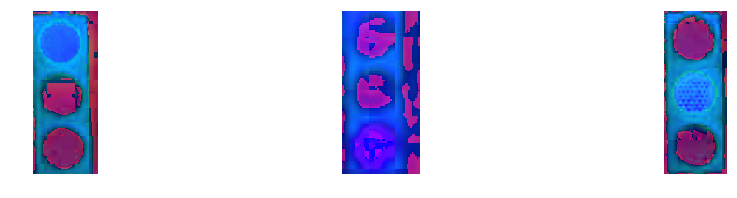

In [4]:
# Convert the HSV
fig, axs = plt.subplots(1, 3, figsize=(16,3))

axs[0].axis('off')
axs[0].imshow(cv2.cvtColor(red_img, cv2.COLOR_BGR2HSV))

axs[1].axis('off')
axs[1].imshow(cv2.cvtColor(green_img, cv2.COLOR_BGR2HSV))

axs[2].axis('off')
axs[2].imshow(cv2.cvtColor(yellow_img, cv2.COLOR_BGR2HSV))

In [5]:
from enum import Enum
class TrafficLight(Enum):
    RED = 0
    YELLOW = 1
    GREEN = 2
    UNKNOWN = 4

RED_MIN1 = np.array([0, 100, 100],np.uint8)
RED_MAX1 = np.array([10, 255, 255],np.uint8)        

RED_MIN2 = np.array([160, 100, 100],np.uint8)
RED_MAX2 = np.array([179, 255, 255],np.uint8)

YELLOW_MIN = np.array([40.0/360*255, 100, 100],np.uint8)
YELLOW_MAX = np.array([66.0/360*255, 255, 255],np.uint8)

GREEN_MIN = np.array([90.0/360*255, 100, 100],np.uint8)
GREEN_MAX = np.array([140.0/360*255, 255, 255],np.uint8)

def Red_Threshold(img):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    frame_threshed1 = cv2.inRange(hsv_img, RED_MIN1, RED_MAX1)
    frame_threshed2 = cv2.inRange(hsv_img, RED_MIN2, RED_MAX2)
    red_threshed = cv2.countNonZero(frame_threshed1) + cv2.countNonZero(frame_threshed2)
    return red_threshed

def Yellow_Threshold(img):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    frame_threshed = cv2.inRange(hsv_img, YELLOW_MIN, YELLOW_MAX)
    yellow_threshed = cv2.countNonZero(frame_threshed)    
    return yellow_threshed

def Green_Threshold(img):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    frame_threshed = cv2.inRange(hsv_img, GREEN_MIN, GREEN_MAX)
    green_threshed = cv2.countNonZero(frame_threshed)
    return green_threshed

def TrafficLightDetection(img):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    frame_threshed1 = cv2.inRange(hsv_img, RED_MIN1, RED_MAX1)
    frame_threshed2 = cv2.inRange(hsv_img, RED_MIN2, RED_MAX2)
    red_threshed = cv2.countNonZero(frame_threshed1) + cv2.countNonZero(frame_threshed2)
    if red_threshed > 100:
        return TrafficLight.RED
    
    frame_threshed = cv2.inRange(hsv_img, YELLOW_MIN, YELLOW_MAX)
    yellow_threshed = cv2.countNonZero(frame_threshed)
    if yellow_threshed > 300:
        return TrafficLight.YELLOW

    frame_threshed = cv2.inRange(hsv_img, GREEN_MIN, GREEN_MAX)
    green_threshed = cv2.countNonZero(frame_threshed)
    if green_threshed > 100:
        return TrafficLight.GREEN
    
    print('TrafficLight UNKNOWN Threshed red, yellow, green', red_threshed, yellow_threshed, green_threshed)
    print(red_threshed)
    return TrafficLight.UNKNOWN

In [6]:
print('Red Threshold', Red_Threshold(red_img))

Red Threshold 2365


In [7]:
redthres_list = []
for img_path in red_imglist:
    img = cv2.imread(img_path)
    redthres_list.append(Red_Threshold(img))
    
print('Max Red Threshold', max(redthres_list))
print('Min Red Threshold', min(redthres_list))
print('Avg Red Threshold', sum(redthres_list)/len(redthres_list))

Max Red Threshold 3873
Min Red Threshold 27
Avg Red Threshold 1363.8846153846155


In [8]:
yellowthres_list = []
for img_path in yellow_imglist:
    img = cv2.imread(img_path)
    yellowthres_list.append(Yellow_Threshold(img))
    
print('Max Yellow Threshold', max(yellowthres_list))
print('Min Yellow Threshold', min(yellowthres_list))
print('Avg Yellow Threshold', sum(yellowthres_list)/len(yellowthres_list))

greenthres_list = []
for img_path in green_imglist:
    img = cv2.imread(img_path)
    greenthres_list.append(Green_Threshold(img))
    
print('Max Green Threshold', max(greenthres_list))
print('Min Green Threshold', min(greenthres_list))
print('Avg Green Threshold', sum(greenthres_list)/len(greenthres_list))


Max Yellow Threshold 1167
Min Yellow Threshold 0
Avg Yellow Threshold 456.35714285714283
Max Green Threshold 1025
Min Green Threshold 0
Avg Green Threshold 346.8255033557047


In [9]:
for i in range(len(red_imglist)):
    img = cv2.imread(red_imglist[i])
    if TrafficLightDetection(img) != TrafficLight.RED:
        print('Check Fail for img', red_imglist[i])

TrafficLight UNKNOWN Threshed red, yellow, green 48 0 0
48
Check Fail for img ./trafficlight_images/Red/image217_crop.jpg
TrafficLight UNKNOWN Threshed red, yellow, green 97 11 0
97
Check Fail for img ./trafficlight_images/Red/image327_crop.jpg
TrafficLight UNKNOWN Threshed red, yellow, green 27 0 0
27
Check Fail for img ./trafficlight_images/Red/image157_crop.jpg


In [10]:
for i in range(len(green_imglist)):
    img = cv2.imread(green_imglist[i])
    if TrafficLightDetection(img) != TrafficLight.GREEN:
        print('Check Green Light Fail at img:', green_imglist[i])

Check Green Light Fail at img: ./trafficlight_images/Green/image459_crop.jpg
Check Green Light Fail at img: ./trafficlight_images/Green/image262_crop.jpg
Check Green Light Fail at img: ./trafficlight_images/Green/image263_crop.jpg
TrafficLight UNKNOWN Threshed red, yellow, green 41 0 0
41
Check Green Light Fail at img: ./trafficlight_images/Green/image323_crop.jpg
TrafficLight UNKNOWN Threshed red, yellow, green 46 0 0
46
Check Green Light Fail at img: ./trafficlight_images/Green/image322_crop.jpg
Check Green Light Fail at img: ./trafficlight_images/Green/image411_crop.jpg
TrafficLight UNKNOWN Threshed red, yellow, green 2 0 25
2
Check Green Light Fail at img: ./trafficlight_images/Green/image17_crop.jpg
TrafficLight UNKNOWN Threshed red, yellow, green 2 0 35
2
Check Green Light Fail at img: ./trafficlight_images/Green/image16_crop.jpg
Check Green Light Fail at img: ./trafficlight_images/Green/image467_crop.jpg
TrafficLight UNKNOWN Threshed red, yellow, green 0 0 12
0
Check Green Light

TrafficLight UNKNOWN Threshed red, yellow, green 88 0 0
88
Check Green Light Fail at img: ./trafficlight_images/Green/image319_crop.jpg
TrafficLight UNKNOWN Threshed red, yellow, green 100 2 0
100
Check Green Light Fail at img: ./trafficlight_images/Green/image318_crop.jpg
TrafficLight UNKNOWN Threshed red, yellow, green 95 10 9
95
Check Green Light Fail at img: ./trafficlight_images/Green/image283_crop.jpg
TrafficLight UNKNOWN Threshed red, yellow, green 88 3 23
88
Check Green Light Fail at img: ./trafficlight_images/Green/image282_crop.jpg
TrafficLight UNKNOWN Threshed red, yellow, green 0 0 17
0
Check Green Light Fail at img: ./trafficlight_images/Green/image47_crop.jpg
TrafficLight UNKNOWN Threshed red, yellow, green 0 0 20
0
Check Green Light Fail at img: ./trafficlight_images/Green/image46_crop.jpg
Check Green Light Fail at img: ./trafficlight_images/Green/image441_crop.jpg
Check Green Light Fail at img: ./trafficlight_images/Green/image440_crop.jpg
Check Green Light Fail at img: